# Decentmon data preparation

In [1]:
import pandas as pd

from decmon.constants import *
from decmon.df_utils import *
from decmon.filter import *
from decmon.plotter import *

In [2]:
SUBDIR = "logs"

In [3]:
path = f"{INPUT_DIR}/{SUBDIR}"

f_df = [load_simulation_data(f"{path}/{i}.log") for i in range(1, 12)]
f_df[1]

,formula_id,x,cent_trace_len,decent_trace_len,odecent_trace_len,cent_num_mess,decent_num_mess,odecent_num_mess,cent_size_mess,decent_size_mess,odecent_size_mess,cent_nb_progressions,decent_nb_progressions,odecent_nb_progressions,formula,trace
0,0,1,2,3,2,3,0,0,1.0,0.00,0.00,3,3,3,"Next (Var ""b"")",{ | |c} ; {a|b|c} ; { |b| } ; {a| |c} ; {a|b|...
1,1,1,4,5,5,9,7,4,1.0,3.75,1.91,16,51,22,"Until (Var ""a"", Var ""c"")",{a| | } ; {a| | } ; {a|b| } ; {a| |c} ; { |b|...
2,2,1,2,3,2,3,0,0,1.0,0.00,0.00,3,3,3,"Next (Var ""c"")",{ | |c} ; {a| | } ; { |b|c} ; {a| |c} ; {a|b|...
3,3,1,2,3,2,3,0,0,1.0,0.00,0.00,3,3,3,"Next (Var ""b"")",{a|b|c} ; { | |c} ; { |b| } ; {a| | } ; { | |...
4,4,1,3,4,3,6,2,0,1.0,1.11,0.00,6,8,6,"Ev (Var ""c"")",{ |b| } ; { | | } ; { | |c} ; { |b| } ; { |b|...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,2971,3,10,12,11,27,8,10,1.0,3.06,2.36,60,138,72,"Ev (Neg (Until (Var ""c"", Var ""a"")))",{a|b| } ; {a|b|c} ; {a|b| } ; { | |c} ; {a| |...
2972,2972,3,13,15,14,36,8,13,1.0,1.40,2.51,66,127,81,"Next (Ev (And (Var ""c"", Var ""b"")))",{a| |c} ; {a| | } ; { | |c} ; {a| |c} ; { |b|...
2973,2973,3,9,10,9,24,2,0,1.0,0.51,0.00,27,45,27,"Glob (Neg (Var ""c""))",{a|b| } ; { | | } ; { | | } ; { |b| } ; {a| |...
2974,2974,3,9,10,9,24,2,0,1.0,0.37,0.00,19,38,19,"Next (Glob (Var ""c""))",{a| | } ; {a|b|c} ; { | |c} ; { | |c} ; {a| |...


In [4]:
patterns = range(len(f_df))

In [5]:

strategies_f_df = [split_by_dictionary(f_df[i], STRATEGIES) for i in patterns]

print(f"Datasets: {len(strategies_f_df)}. Strategies: {len(strategies_f_df[0])}. Single dataset Formulae:{len(strategies_f_df[0][0])}")
sep_strat_f_df = [pd.concat(strategies_f_df[i], ignore_index=True) for i in patterns]
sep_strat_f_df[0]

Datasets: 11. Strategies: 3. Single dataset Formulae:3073


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy
0,0,1,3,6,1.00,12,"Until (Var ""c"", Var ""a"")",{ |b|c} ; { |b|c} ; { |b| } ; { | | } ; {a| |...,orchestration
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | | } ; {a|b|c} ; { |b| } ; {a|b| } ; {a| |...,orchestration
2,2,1,2,3,1.00,8,"Until (Var ""a"", Var ""c"")",{a| | } ; { |b|c} ; {a|b|c} ; { | | } ; {a|b|...,orchestration
3,3,1,2,3,1.00,4,"Glob (Var ""c"")",{ |b|c} ; {a|b| } ; {a| |c} ; {a| |c} ; {a| |...,orchestration
4,4,1,2,3,1.00,4,"Glob (Var ""a"")",{a| | } ; { | |c} ; {a|b|c} ; { |b| } ; { |b|...,orchestration
...,...,...,...,...,...,...,...,...,...
9214,3068,4,11,2,0.33,127,"And (Or (Var ""c"", Glob (Next (Next (Var ""a""))...",{a|b| } ; { | | } ; {a| | } ; {a| | } ; {a| |...,choreography
9215,3069,4,12,11,2.42,75,"And (Or (Glob (Or (Var ""c"", Var ""a"")), Neg (V...",{a|b|c} ; { |b|c} ; {a| |c} ; {a| |c} ; { |b|...,choreography
9216,3070,4,18,17,2.62,203,"Until (Ev (Var ""a""), And (Var ""b"", Var ""a""))",{ |b| } ; {a| | } ; { | | } ; { |b| } ; { | |...,choreography
9217,3071,4,13,0,0.00,141,"Glob (Or (Glob (Neg (Var ""a"")), Var ""a""))",{a| |c} ; {a|b|c} ; { | | } ; { |b|c} ; { | |...,choreography


In [16]:
merged_metrics_df = [extract_metrics(sep_strat_f_df[i]) for i in patterns]

merged_metrics_df[0].max()

formula_id             3072
strategy      orchestration
value                5120.0
metric            trace_len
dtype: object

## Formula Encoding

In [7]:
df_f_ops = [extract_ops(sep_strat_f_df[i])[0] for i in patterns]

df_f_ops[0]

,total_ops_list_1,total_ops_list_10,total_ops_list_11,total_ops_list_12,total_ops_list_13,total_ops_list_14,total_ops_list_15,total_ops_list_16,total_ops_list_17,total_ops_list_18,...,total_ops_list_81,total_ops_list_82,total_ops_list_83,total_ops_list_84,total_ops_list_85,total_ops_list_86,total_ops_list_87,total_ops_list_88,total_ops_list_89,total_ops_list_9
0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,4,0.0,5.0,12.0,11.0,11.0,6.0,-1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9215,4,0.0,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9216,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9217,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## Plotting

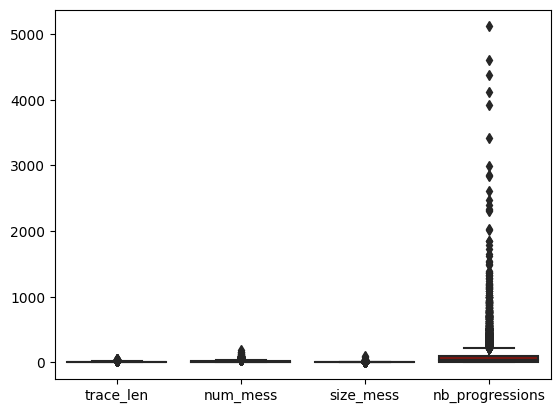

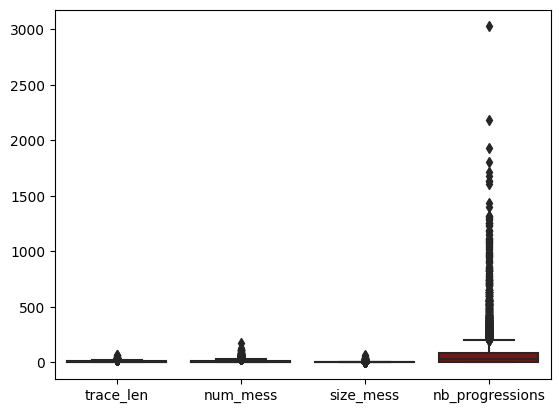

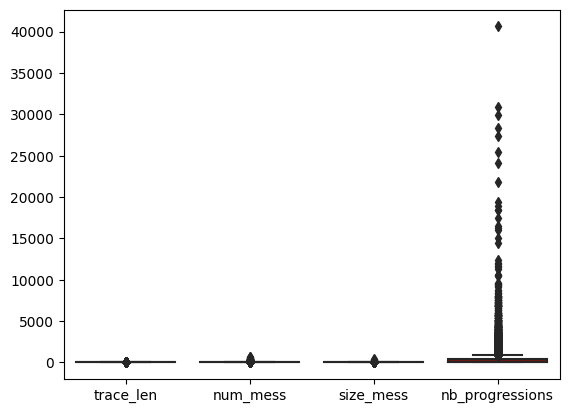

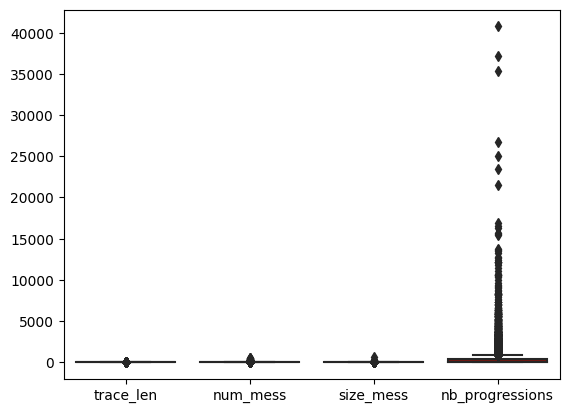

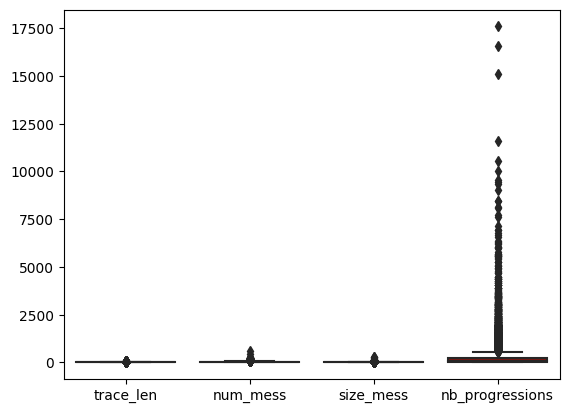

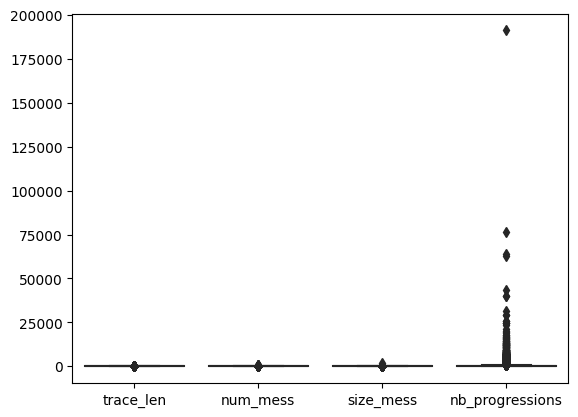

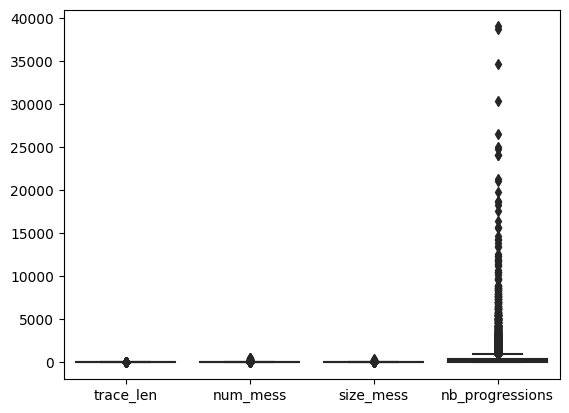

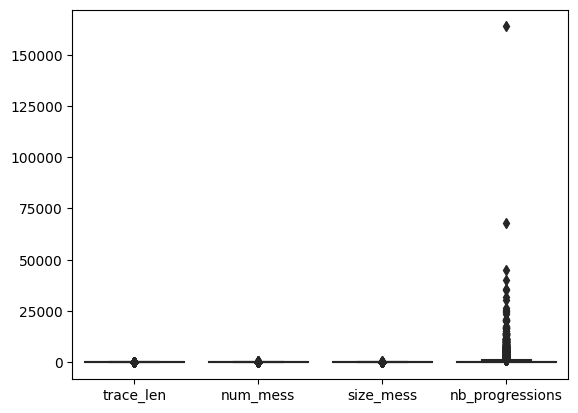

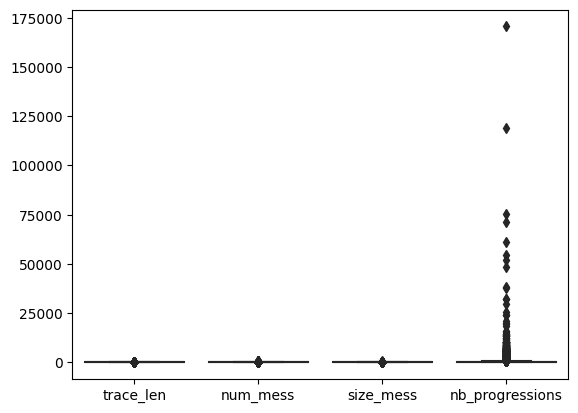

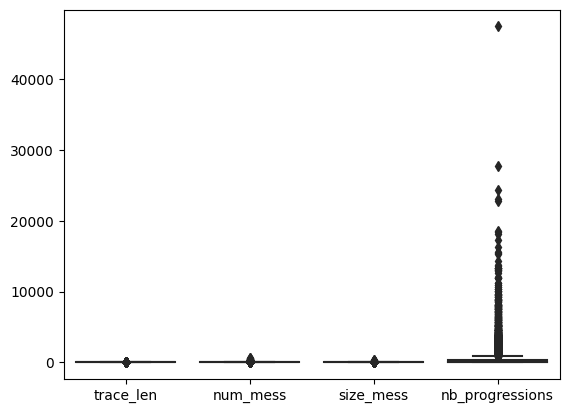

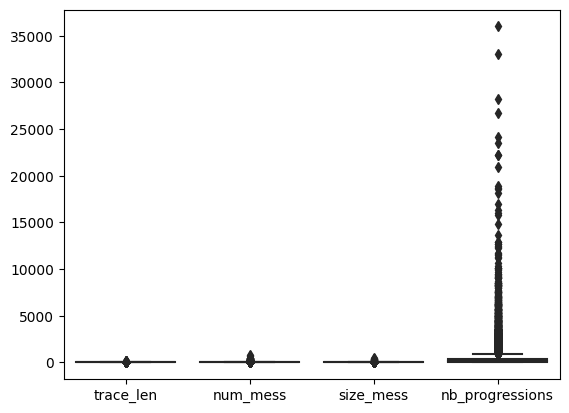

In [14]:
from matplotlib import pyplot as plt

to_drop = ['formula_id', 'x']

for i in patterns:
    cleaned_up_data = sep_strat_f_df[i].drop(to_drop, axis=1)
    plot = plot_boxplot(cleaned_up_data)
    plt.show()

In [ ]:
# from matplotlib import pyplot as plt
#
# COLS = 3
# ROWS = 4
#
# fig, axs = plt.subplots(ncols=COLS, nrows=ROWS, figsize=(14,5))
#
# to_drop = ['formula_id', 'x']
#
# for i in patterns:
#     col = i % COLS
#     row = i % ROWS
#
#     cleaned_up_data = sep_strat_f_df[i].drop(to_drop, axis=1)
#     plot = plot_boxplot(cleaned_up_data, ax=axs[col][row])
#
# fig

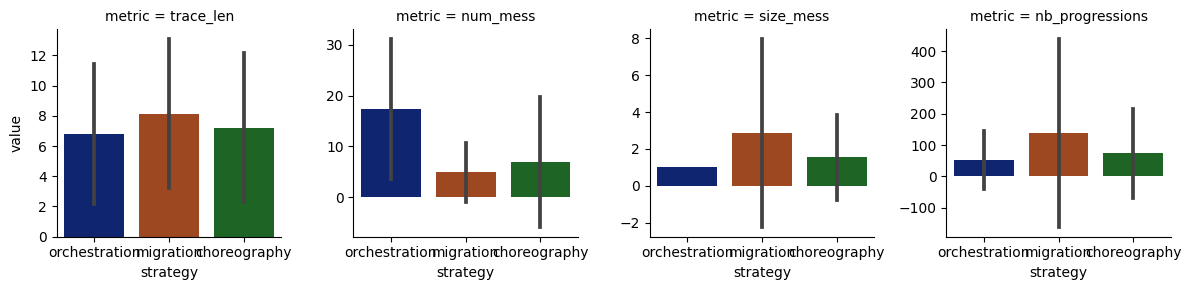

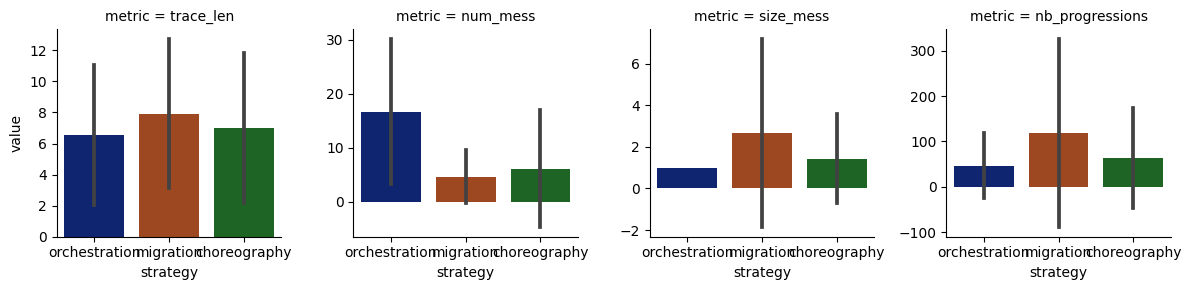

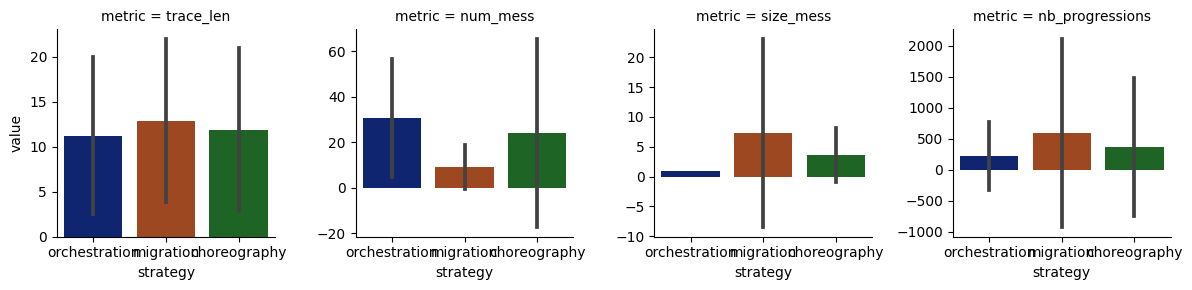

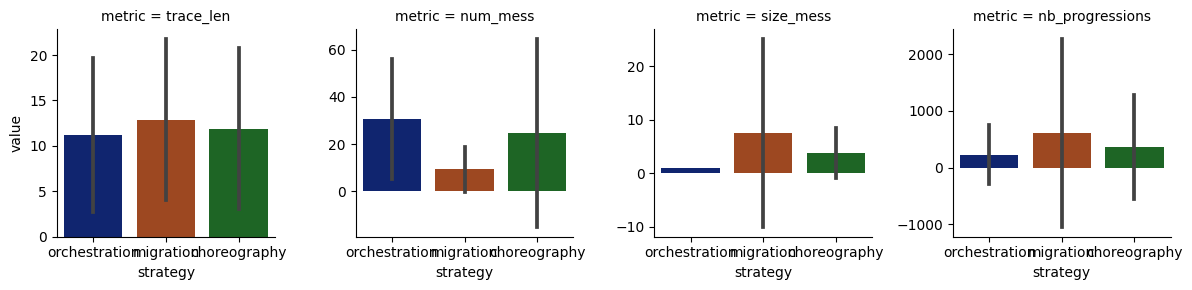

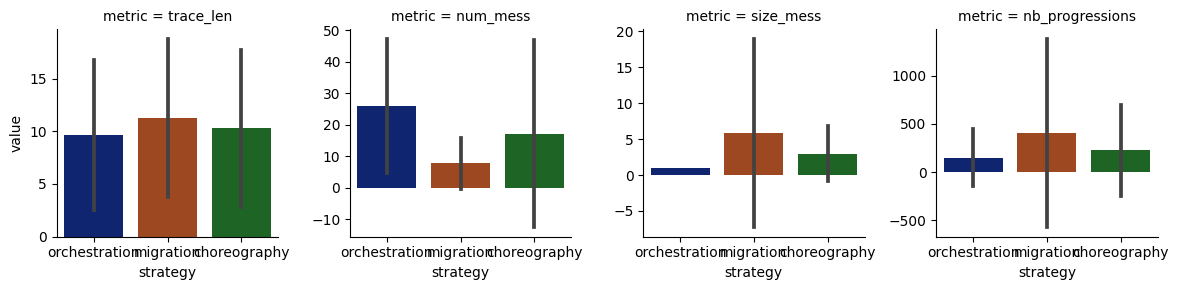

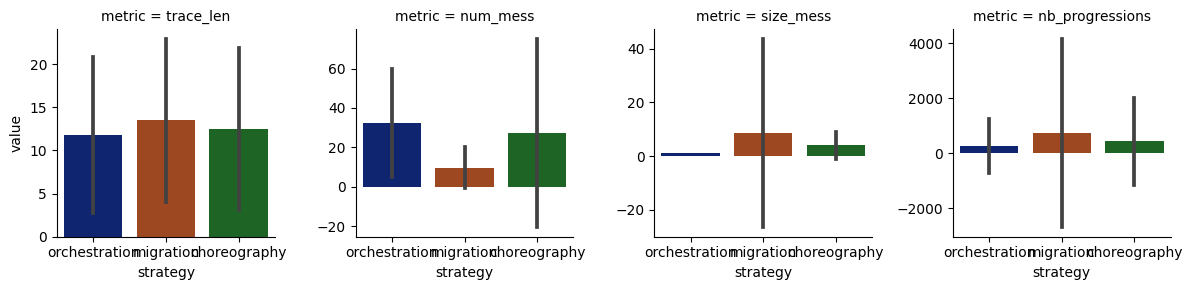

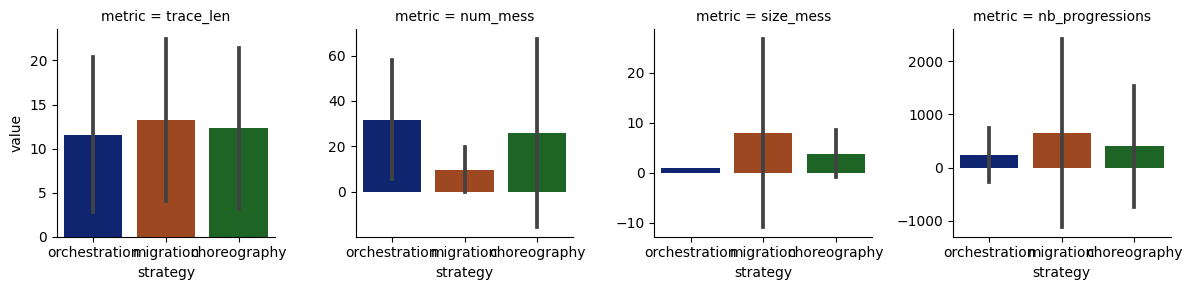

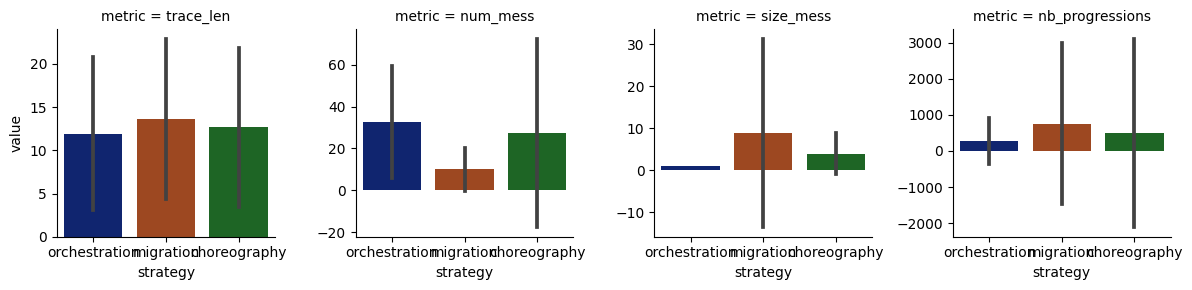

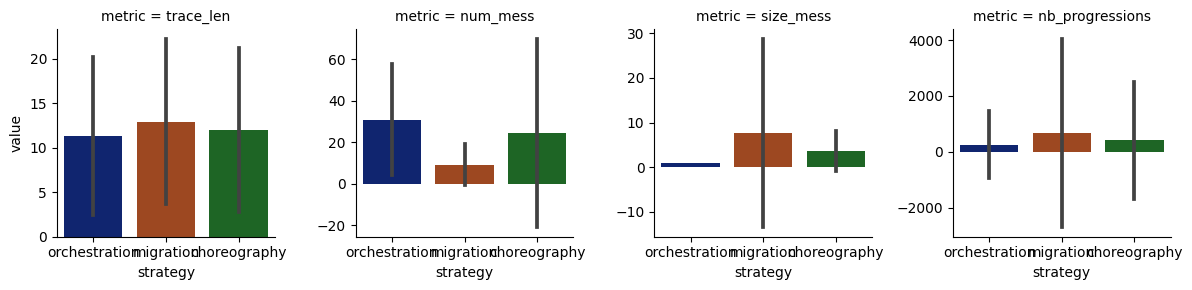

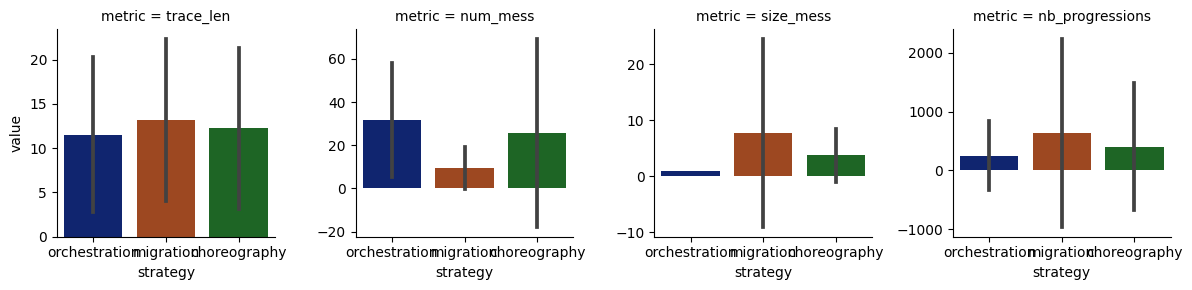

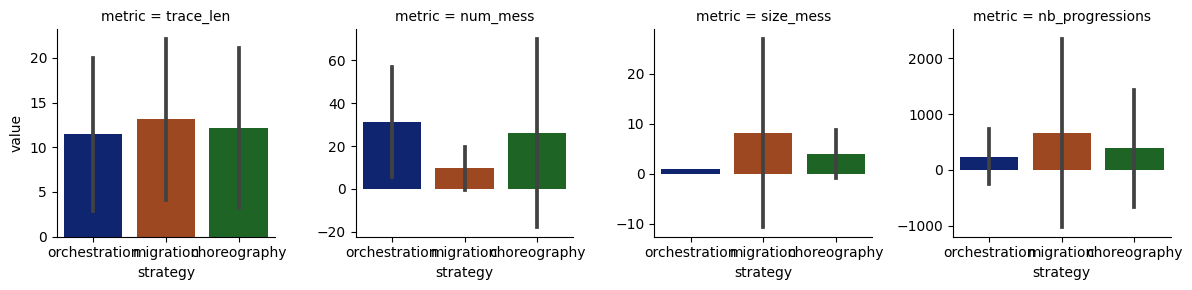

In [17]:
for i in patterns:
    grid_plot = plot_grid_barplots(merged_metrics_df[i], grid_cell_field= 'metric',
              y_axis = 'value', x_axis = 'strategy',
              order = ['orchestration', 'migration', 'choreography'])

#grid_plot.savefig("output/out.png")

In [20]:
merged_metrics_df[1]

,formula_id,strategy,value,metric
0,0,orchestration,2.0,trace_len
1,1,orchestration,4.0,trace_len
2,2,orchestration,2.0,trace_len
3,3,orchestration,2.0,trace_len
4,4,orchestration,3.0,trace_len
...,...,...,...,...
8923,2971,choreography,72.0,nb_progressions
8924,2972,choreography,81.0,nb_progressions
8925,2973,choreography,27.0,nb_progressions
8926,2974,choreography,19.0,nb_progressions


In [21]:
# ndf = merged_metrics.copy()
# ndf['strategy'] = ndf['strategy'].str.replace("^cent_", "1", regex=True)
# ndf['strategy'] = ndf['strategy'].str.replace("^decent_", "2", regex=True)
# ndf['strategy'] = ndf['strategy'].str.replace("^odecent_", "3", regex=True)
# ndf

In [24]:
expanded_f_df = [sep_strat_f_df[i].merge(df_f_ops[i], left_index=True, right_index=True) for i in patterns]
expanded_f_df[0]

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,total_ops_list_1,...,total_ops_list_81,total_ops_list_82,total_ops_list_83,total_ops_list_84,total_ops_list_85,total_ops_list_86,total_ops_list_87,total_ops_list_88,total_ops_list_89,total_ops_list_9
0,0,1,3,6,1.00,12,"Until (Var ""c"", Var ""a"")",{ |b|c} ; { |b|c} ; { |b| } ; { | | } ; {a| |...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | | } ; {a|b|c} ; { |b| } ; {a|b| } ; {a| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,3,1.00,8,"Until (Var ""a"", Var ""c"")",{a| | } ; { |b|c} ; {a|b|c} ; { | | } ; {a|b|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,3,1.00,4,"Glob (Var ""c"")",{ |b|c} ; {a|b| } ; {a| |c} ; {a| |c} ; {a| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,3,1.00,4,"Glob (Var ""a"")",{a| | } ; { | |c} ; {a|b|c} ; { |b| } ; { |b|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,3068,4,11,2,0.33,127,"And (Or (Var ""c"", Glob (Next (Next (Var ""a""))...",{a|b| } ; { | | } ; {a| | } ; {a| | } ; {a| |...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9215,3069,4,12,11,2.42,75,"And (Or (Glob (Or (Var ""c"", Var ""a"")), Neg (V...",{a|b|c} ; { |b|c} ; {a| |c} ; {a| |c} ; { |b|...,choreography,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9216,3070,4,18,17,2.62,203,"Until (Ev (Var ""a""), And (Var ""b"", Var ""a""))",{ |b| } ; {a| | } ; { | | } ; { |b| } ; { | |...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9217,3071,4,13,0,0.00,141,"Glob (Or (Glob (Neg (Var ""a"")), Var ""a""))",{a| |c} ; {a|b|c} ; { | | } ; { |b|c} ; { | |...,choreography,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [26]:
for i in patterns:
    expanded_f_df[i].strategy = pd.Categorical(expanded_f_df[i].strategy)
    expanded_f_df[i]['strategy_id'] = expanded_f_df[i].strategy.cat.codes

full_scale_df = pd.concat(expanded_f_df)
full_scale_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,total_ops_list_1,...,total_ops_list_356,total_ops_list_357,total_ops_list_358,total_ops_list_359,total_ops_list_360,total_ops_list_361,total_ops_list_362,total_ops_list_363,total_ops_list_364,total_ops_list_365
0,0,1,3,6,1.00,12,"Until (Var ""c"", Var ""a"")",{ |b|c} ; { |b|c} ; { |b| } ; { | | } ; {a| |...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | | } ; {a|b|c} ; { |b| } ; {a|b| } ; {a| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,3,1.00,8,"Until (Var ""a"", Var ""c"")",{a| | } ; { |b|c} ; {a|b|c} ; { | | } ; {a|b|...,orchestration,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,3,1.00,4,"Glob (Var ""c"")",{ |b|c} ; {a|b| } ; {a| |c} ; {a| |c} ; {a| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,3,1.00,4,"Glob (Var ""a"")",{a| | } ; { | |c} ; {a|b|c} ; { |b| } ; { |b|...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,5157,6,46,179,12.54,3049,"Ev (Neg (Until (And (Until (Var ""c"", Var ""a"")...",{ |b| } ; { | |c} ; { | |c} ; {a| |c} ; { | |...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15482,5158,6,19,54,8.00,654,"Or (Ev (Neg (Until (Or (And (Var ""a"", Neg (Va...",{a| |c} ; {a| |c} ; {a|b| } ; { | | } ; { | |...,choreography,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15483,5159,6,18,17,2.62,922,"Glob (Next (Until (Neg (Until (Var ""a"", Var ""...",{ | | } ; { |b| } ; { | | } ; { | |c} ; { |b|...,choreography,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15484,5160,6,21,99,13.41,788,"Or (Glob (Var ""a""), Ev (Next (And (Next (And ...",{a| | } ; { |b| } ; {a| |c} ; { |b| } ; { | |...,choreography,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# gsdf = expanded_df[strategies_df['nb_progressions'].isin(expanded_df.groupby(['formula_id', 'trace']).min()['nb_progressions'].values)]
# gsdf1 = expanded_df.sort_values(['nb_progressions'],ascending=True).set_index(['formula_id', 'trace'])
# # gsdf1
#
# #idx = (gsdf1['nb_progressions'].min().values.tolist())
# #gsdf2 = gsdf1.loc[gsdf1['nb_progressions'].min()]
# gsdf2 = gsdf1[gsdf1.groupby(['formula_id', 'trace'])['nb_progressions'].transform('first') != gsdf1['nb_progressions']]
# gsdf2

In [ ]:
# expanded_df2 = gsdf2.reset_index()
# expanded_df2

In [ ]:
# f_ops_stats.hist(column='total_ops')
# f_ops_stats['total_ops'].value_counts()

In [ ]:
# TODO:
# -- pycaret for classification
# Action points
# - higher number of nodes (5, 7, 9?)
# - statistics about the learning
# - test other algorithms (pycaret)